In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
from statsmodels.formula.api import ols
from scipy.stats import boxcox

In [2]:
# --------------------------
# Question 1
# --------------------------

                            OLS Regression Results                            
Dep. Variable:                   Fare   R-squared:                       0.994
Model:                            OLS   Adj. R-squared:                  0.994
Method:                 Least Squares   F-statistic:                     2469.
Date:                Sat, 06 Sep 2025   Prob (F-statistic):           4.62e-18
Time:                        16:26:37   Log-Likelihood:                -62.889
No. Observations:                  17   AIC:                             129.8
Df Residuals:                      15   BIC:                             131.4
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     48.9718      4.405     11.116      0.0

/var/folders/t0/cl4mx7656030fy5dm2t2jwsr0000gn/T/ipykernel_46678/235742519.py:2: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  airfares = pd.read_csv("airfares.txt", delim_whitespace=True)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/scipy/stats/_axis_nan_policy.py:418: UserWarning: `kurtosistest` p-value may be inaccurate with fewer than 20 observations; only n=17 observations were given.
  return hypotest_fun_in(*args, **kwds)


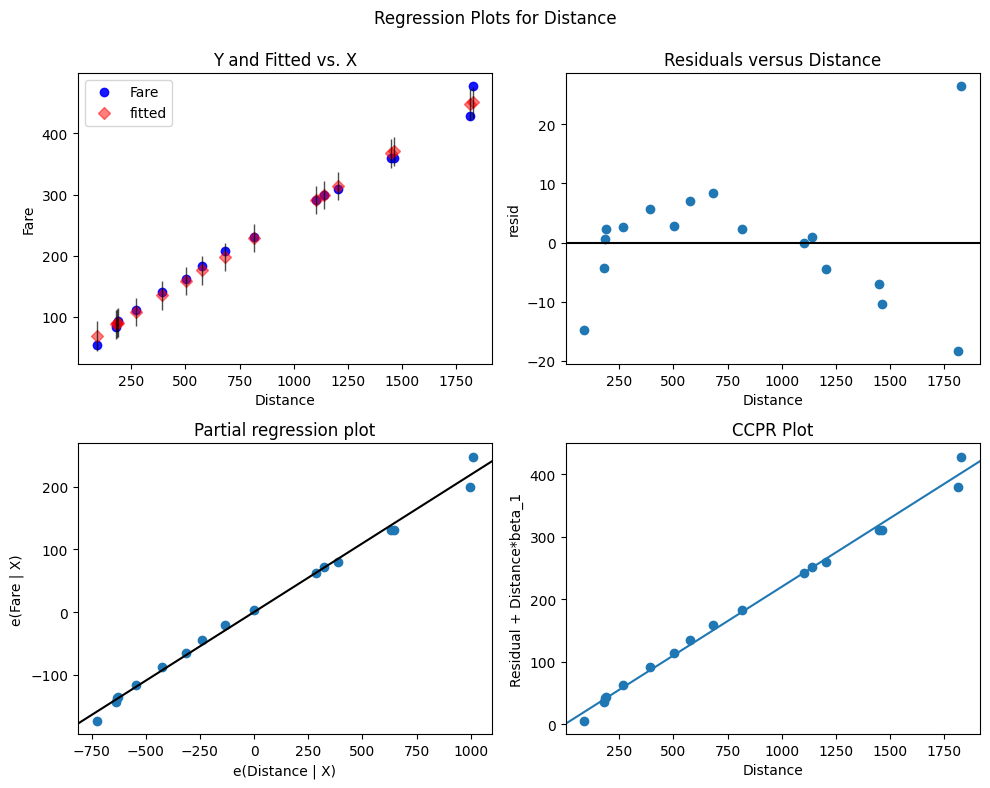

In [4]:
# a. Load data and fit linear model
airfares = pd.read_csv("airfares.txt", delim_whitespace=True)
airfares_model = ols('Fare ~ Distance', data=airfares).fit()
print(airfares_model.summary())

# Diagnostic plots
fig = plt.figure(figsize=(10, 8))
sm.graphics.plot_regress_exog(airfares_model, "Distance", fig=fig)
plt.show()


Box-Cox lambda: 0.33817308251557127
                            OLS Regression Results                            
Dep. Variable:             Fare_power   R-squared:                       0.994
Model:                            OLS   Adj. R-squared:                  0.994
Method:                 Least Squares   F-statistic:                     2485.
Date:                Sat, 06 Sep 2025   Prob (F-statistic):           4.41e-18
Time:                        16:26:42   Log-Likelihood:                -65.023
No. Observations:                  17   AIC:                             134.0
Df Residuals:                      15   BIC:                             135.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     51

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/scipy/stats/_axis_nan_policy.py:418: UserWarning: `kurtosistest` p-value may be inaccurate with fewer than 20 observations; only n=17 observations were given.
  return hypotest_fun_in(*args, **kwds)


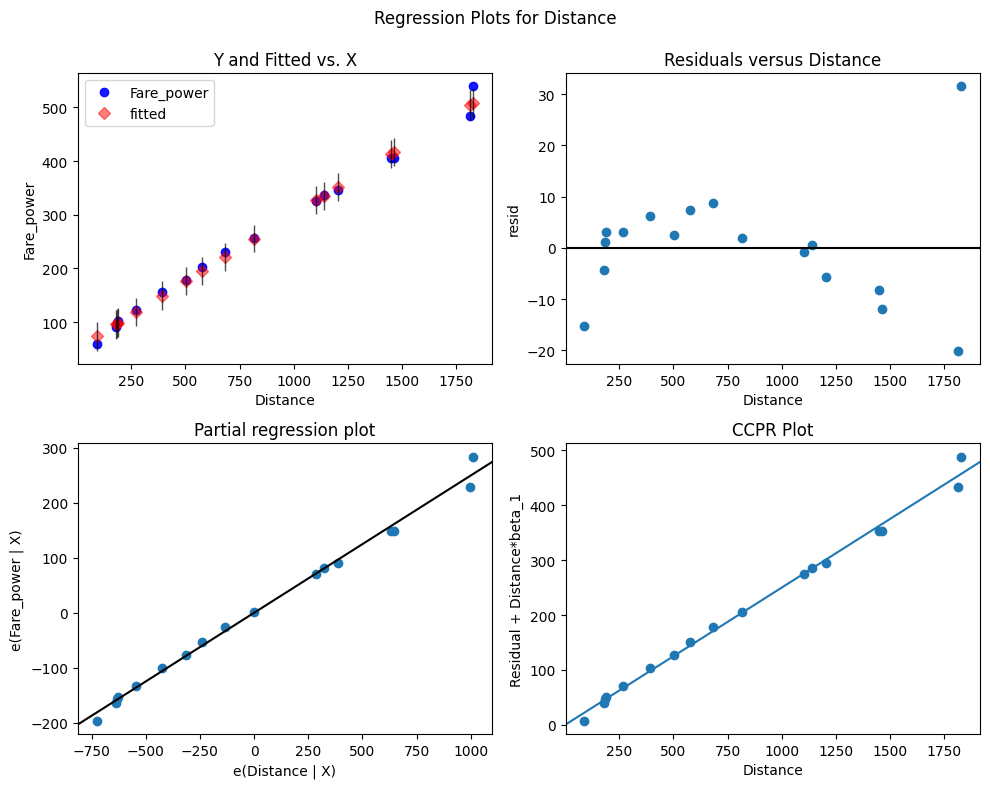

In [ ]:
# b. Transformations
# Power transform (Box-Cox)
fare_positive = airfares['Fare'] + 1e-6  # Box-Cox requires positive values
fitted_data, fitted_lambda = boxcox(fare_positive)
print("Box-Cox lambda:", fitted_lambda)

# Example: fit model with lambda ≈ 1.02
lambda_val = 1.02
airfares['Fare_power'] = airfares['Fare'] ** lambda_val
airfares_model_power = ols('Fare_power ~ Distance', data=airfares).fit()
print(airfares_model_power.summary())

# Diagnostic plots for transformed model
fig = plt.figure(figsize=(10, 8))
sm.graphics.plot_regress_exog(airfares_model_power, "Distance", fig=fig)
plt.show()


                             OLS Regression Results                             
Dep. Variable:     SuggestedRetailPrice   R-squared:                       0.999
Model:                              OLS   Adj. R-squared:                  0.999
Method:                   Least Squares   F-statistic:                 1.704e+05
Date:                  Sat, 06 Sep 2025   Prob (F-statistic):               0.00
Time:                          16:27:03   Log-Likelihood:                -1822.8
No. Observations:                   234   AIC:                             3650.
Df Residuals:                       232   BIC:                             3657.
Df Model:                             1                                         
Covariance Type:              nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    -61.9042     81.801

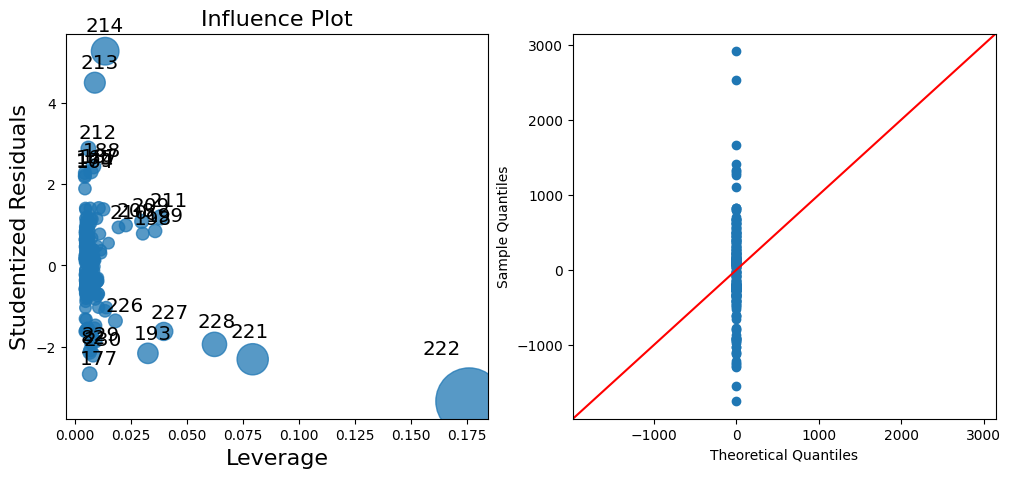

                                 OLS Regression Results                                 
Dep. Variable:     np.log(SuggestedRetailPrice)   R-squared:                       0.998
Model:                                      OLS   Adj. R-squared:                  0.998
Method:                           Least Squares   F-statistic:                 1.505e+05
Date:                          Sat, 06 Sep 2025   Prob (F-statistic):               0.00
Time:                                  16:27:03   Log-Likelihood:                 600.70
No. Observations:                           234   AIC:                            -1197.
Df Residuals:                               232   BIC:                            -1190.
Df Model:                                     1                                         
Covariance Type:                      nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
-----------------------

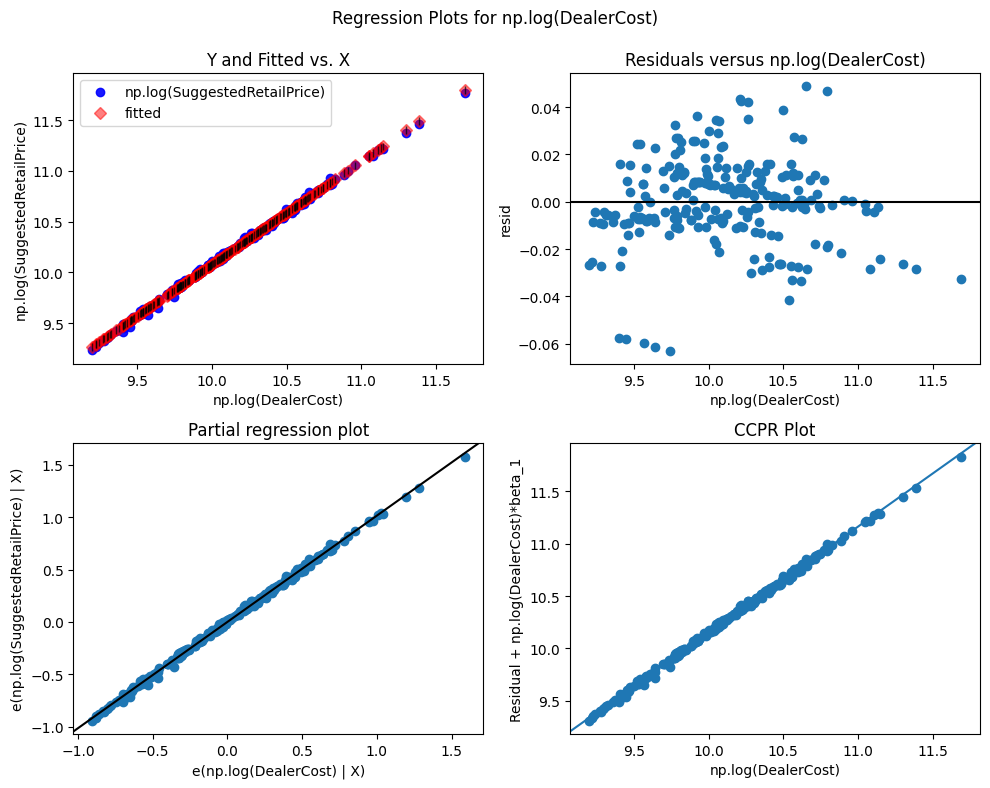

In [6]:
# --------------------------
# Question 2
# --------------------------

cars = pd.read_csv("cars04.csv")

# Original model
cars_model = ols('SuggestedRetailPrice ~ DealerCost', data=cars).fit()
print(cars_model.summary())

# a & b: Diagnostic plots
fig, axes = plt.subplots(1, 2, figsize=(12, 5))
sm.graphics.influence_plot(cars_model, ax=axes[0], criterion="cooks")
sm.graphics.qqplot(cars_model.resid, line='45', ax=axes[1])
plt.show()

# e. Log-log transformation
cars_model_log = ols('np.log(SuggestedRetailPrice) ~ np.log(DealerCost)', data=cars).fit()
print(cars_model_log.summary())

# Diagnostic plots for log-log model
fig = plt.figure(figsize=(10, 8))
sm.graphics.plot_regress_exog(cars_model_log, 'np.log(DealerCost)', fig=fig)
plt.show()

                            OLS Regression Results                            
Dep. Variable:                  Price   R-squared:                       0.978
Model:                            OLS   Adj. R-squared:                  0.978
Method:                 Least Squares   F-statistic:                     2135.
Date:                Sat, 06 Sep 2025   Prob (F-statistic):           7.96e-41
Time:                        16:27:12   Log-Likelihood:                -237.71
No. Observations:                  49   AIC:                             479.4
Df Residuals:                      47   BIC:                             483.2
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   -258.0504     16.940    -15.233      0.0

/var/folders/t0/cl4mx7656030fy5dm2t2jwsr0000gn/T/ipykernel_46678/2193758401.py:5: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  diamonds = pd.read_csv("diamonds.txt", delim_whitespace=True)


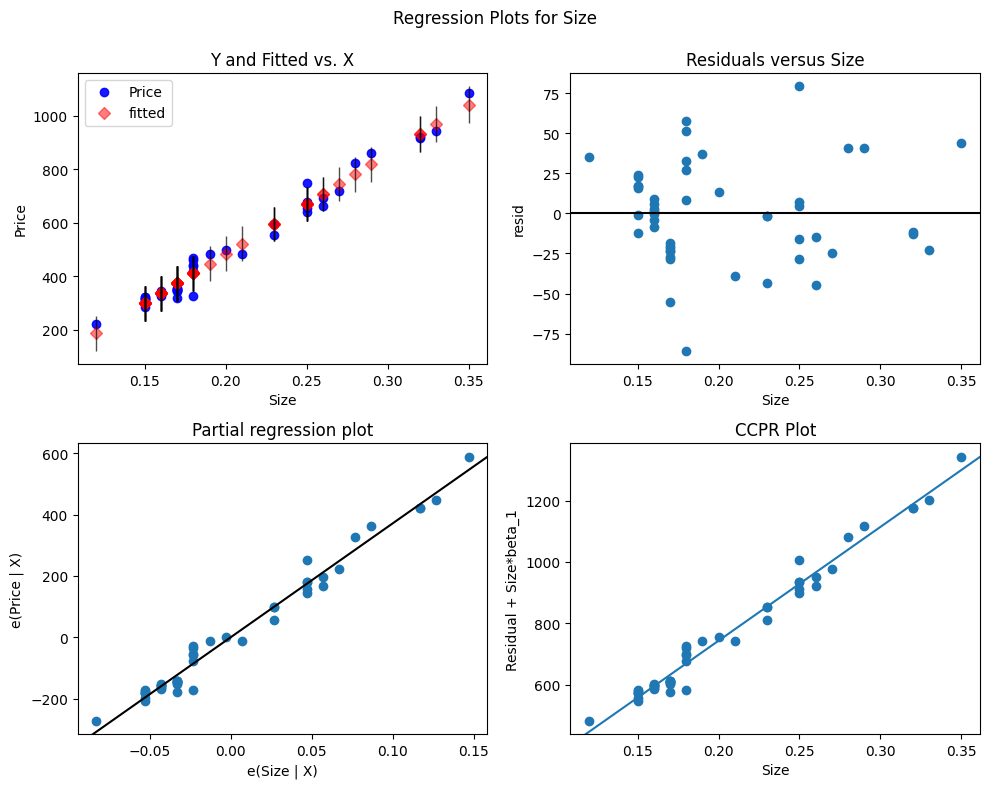

                            OLS Regression Results                            
Dep. Variable:            Price_power   R-squared:                       0.979
Model:                            OLS   Adj. R-squared:                  0.978
Method:                 Least Squares   F-statistic:                     2147.
Date:                Sat, 06 Sep 2025   Prob (F-statistic):           7.01e-41
Time:                        16:27:12   Log-Likelihood:                -215.87
No. Observations:                  49   AIC:                             435.7
Df Residuals:                      47   BIC:                             439.5
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   -144.0609     10.849    -13.279      0.0

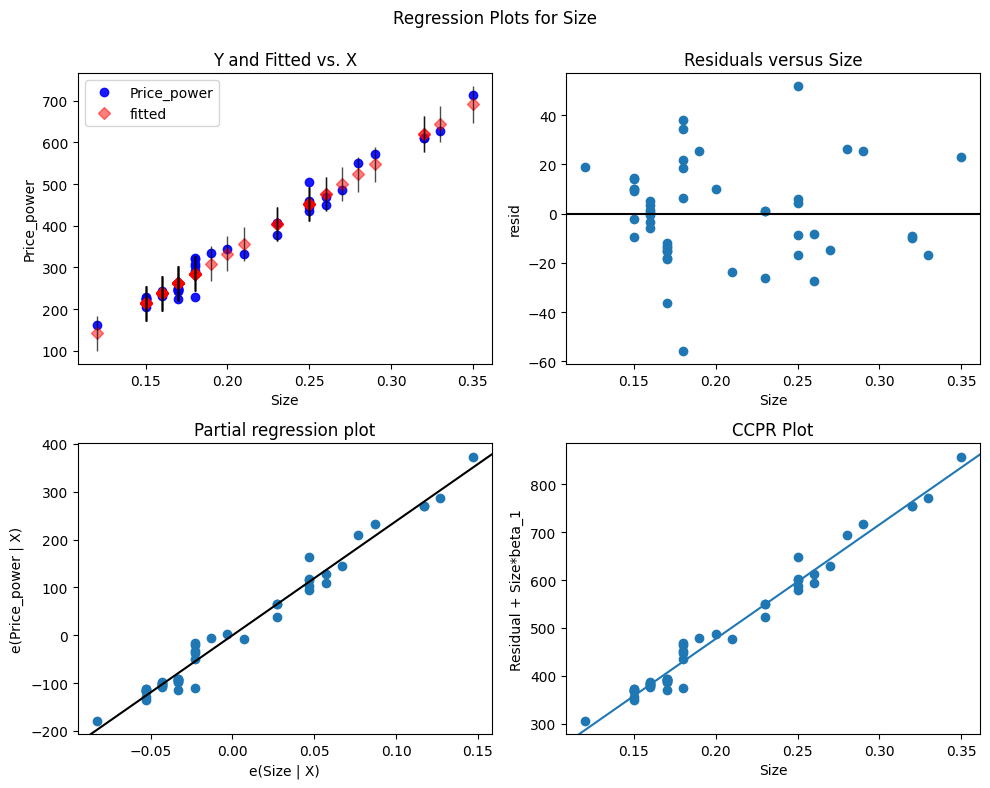

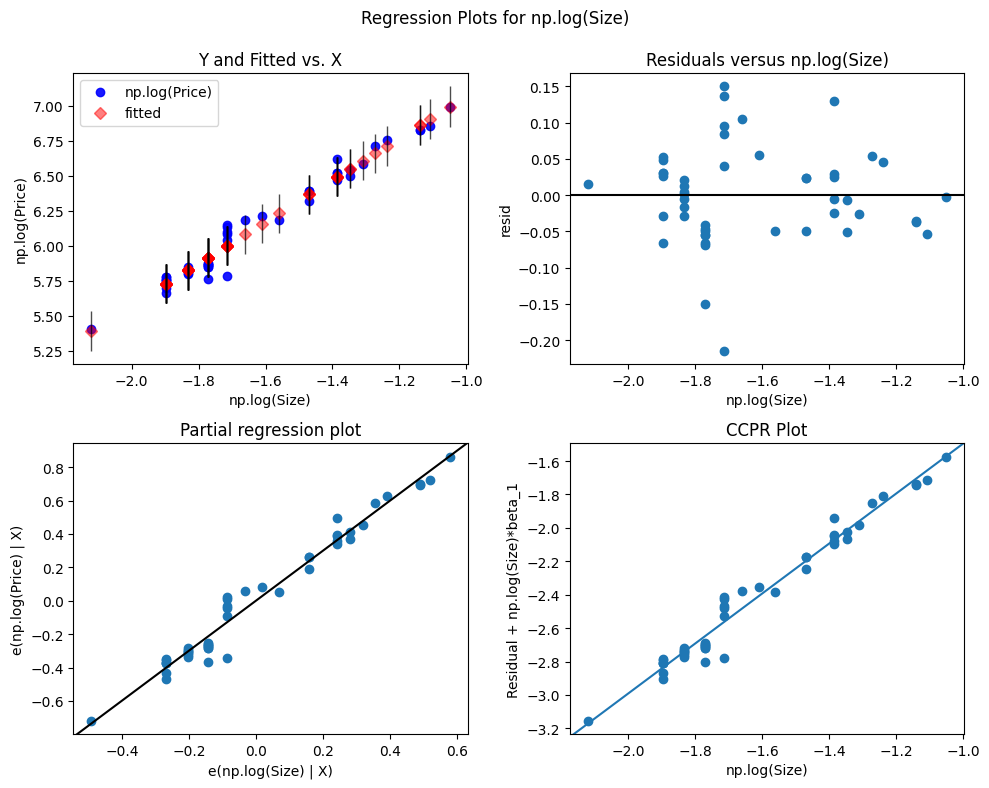

In [7]:
# --------------------------
# Question 3
# --------------------------

diamonds = pd.read_csv("diamonds.txt", delim_whitespace=True)

# Part 1: Original model
diamonds_model = ols('Price ~ Size', data=diamonds).fit()
print(diamonds_model.summary())

# Diagnostic plots
fig = plt.figure(figsize=(10, 8))
sm.graphics.plot_regress_exog(diamonds_model, "Size", fig=fig)
plt.show()

# Part 2: Transformations
# Power transform: lambda ≈ 0.94
diamonds['Price_power'] = diamonds['Price'] ** 0.94
diamonds_model_power = ols('Price_power ~ Size', data=diamonds).fit()
print(diamonds_model_power.summary())

# Log transformation
diamonds_model_log = ols('np.log(Price) ~ np.log(Size)', data=diamonds).fit()
print(diamonds_model_log.summary())

# Diagnostic plots for power model
fig = plt.figure(figsize=(10, 8))
sm.graphics.plot_regress_exog(diamonds_model_power, "Size", fig=fig)
plt.show()

# Diagnostic plots for log model
fig = plt.figure(figsize=(10, 8))
sm.graphics.plot_regress_exog(diamonds_model_log, "np.log(Size)", fig=fig)
plt.show()